In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

intstall terlebih dahulu library yellow brick dengan perintah pip install yellowbrick

In [2]:
from yellowbrick.cluster import KElbowVisualizer

In [5]:
data = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


preprocesing adalah proses untuk mengubah data menjadi numerik

In [9]:
x = data[['AnnualIncome', 'SpendingScore']].values
x

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

In [11]:
#karena standar besar atau kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi telrebih dahulu menggunaakn standardscaler
x = StandardScaler().fit_transform(x)
x

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

<h2>Metode Elbow</h2>
sebelum men-training model k-means, sebaiknya kita mencari niali k yang paling baik/optimal terlebih dahulu. nilai ini bisa kita cari menggunakan metode elbow atau kelowvisualizer pada python

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

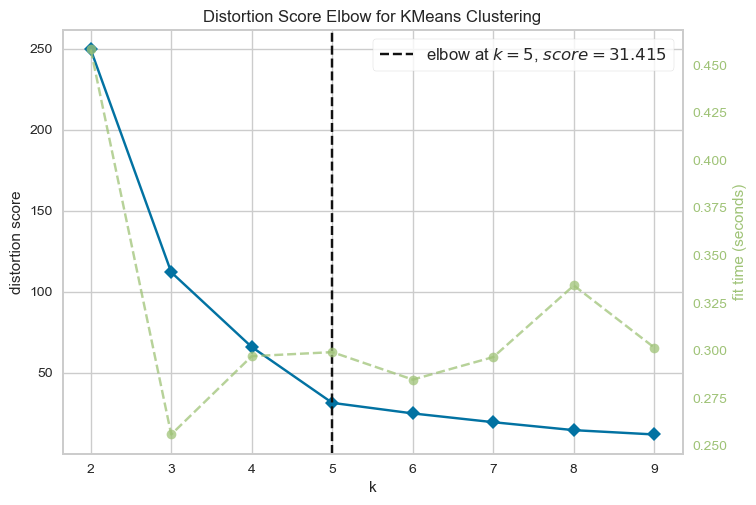

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
tesModel = KMeans(random_state=42)
visualizer = KElbowVisualizer(tesModel, k=(2,10))
visualizer.fit(x)
visualizer.show()

<h2>Modeling</h2>
kita training menggunakan algoritma k-means dengan
cluster berjumlah 5 (k=5)
random state bernilai 42
random state berguna untuk mengontrol ke randoman inisialisasi centroid

In [14]:
#hyperparameter tuning
jumlahCluster = 5
randomizer = 42
modelKmeans = KMeans(n_clusters=jumlahCluster, random_state=randomizer)

modelKmeans.fit(x)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [16]:
labelKmeans = modelKmeans.labels_
labelKmeans

array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 4])

In [15]:
print(modelKmeans.cluster_centers_)

[[-0.17079383 -0.15322869]
 [ 7.52694521 -0.11868539]
 [-0.11772005  0.91897759]
 [-0.09894748 -1.20506271]
 [ 0.37342132  4.15876808]]


<h2>Evaluasi Model</h2>
1. Melihat dendogram
2. Metode Elbow
3. Visualisasi Data
4. silhoutte Coefficient (SC)


<h3>Visualisasi hasil clustering</h3>

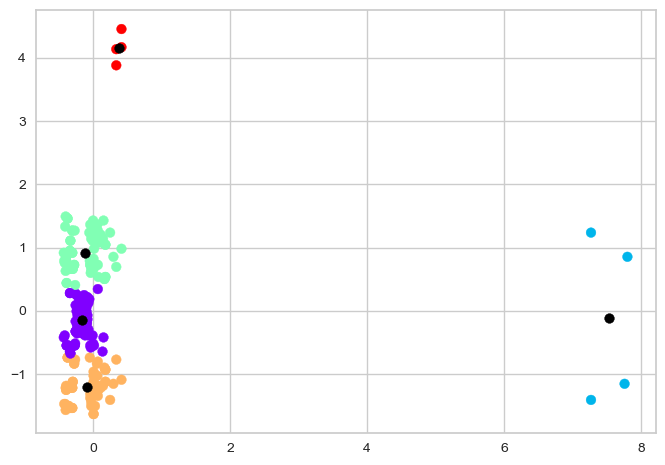

In [18]:
plt.scatter(x[:,0],x[:,1],c=labelKmeans, cmap='rainbow')

#visualisasi centroid
plt.scatter(modelKmeans.cluster_centers_[:,0], modelKmeans.cluster_centers_[:,1], color='black')
plt.show()

<h3>Silhoutte Coefision</h3>
semakin mendekati 1, maka semakin bagus untuk model clustering.

In [19]:
scMeans = silhouette_score(x, labelKmeans, metric='euclidean')
print('Silhoutte Score model k_means=', scMeans)

Silhoutte Score model k_means= 0.5726323363916132


<h3>Kesimpulan</h3>

In [20]:
#masukkan hasil clustering ke dataset
data['Hasil Clustering'] = labelKmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


In [21]:
#hitung rata rata tiap cluster
for i in range(jumlahCluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukan customer :', data[data['Hasil Clustering']==i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer :', data[data['Hasil Clustering']==i]['SpendingScore'].mean())
    print()

Cluster ke-0
Rata-rata pemasukan customer : 52.722772277227726
Rata-rata pengeluaran customer : 47.415841584158414

Cluster ke-1
Rata-rata pemasukan customer : 1167.0
Rata-rata pengeluaran customer : 48.5

Cluster ke-2
Rata-rata pemasukan customer : 60.4054054054054
Rata-rata pengeluaran customer : 81.06756756756756

Cluster ke-3
Rata-rata pemasukan customer : 63.12280701754386
Rata-rata pengeluaran customer : 14.403508771929825

Cluster ke-4
Rata-rata pemasukan customer : 131.5
Rata-rata pengeluaran customer : 182.75

